In [1]:
import warnings
warnings.simplefilter("ignore")
import requests
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import talib
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num

In [2]:
# Get today's date as UTC timestamp
today = datetime.today().strftime("%d/%m/%Y")
today = datetime.strptime(today + " +0000", "%d/%m/%Y %z")
to = int(today.timestamp())
# Get date ten years ago as UTC timestamp
ten_yr_ago = today-relativedelta(years=10)
fro = int(ten_yr_ago.timestamp())

In [3]:
def get_price_hist(ticker):

    # Put stock price data in dataframe
    url = "https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={fro}&period2={to}&interval=1d&events=history".format(ticker=ticker, fro=fro, to=to)
    data = pd.read_csv(url)
    
    # Convert date to timestamp and make index
    data.index = data["Date"].apply(lambda x: pd.Timestamp(x))
    data.drop("Date", axis=1, inplace=True)

    return data

In [4]:
def get_indicators(data):
    # Get MACD
    data["macd"], data["macd_signal"], data["macd_hist"] = talib.MACD(data['Close'].to_numpy())
    
    # Get MA10 and MA30
    data["ma10"] = talib.MA(data["Close"].to_numpy(), timeperiod=10)
    data["ma30"] = talib.MA(data["Close"].to_numpy(), timeperiod=30)
    
    # Get RSI
    data["rsi"] = talib.RSI(data["Close"].to_numpy())
    return data

In [5]:
def plot_chart(data, n, ticker):
    
    # Filter number of observations to plot
    data = data.iloc[-n:]
    
    # Create figure and set axes for subplots
    fig = plt.figure()
    fig.set_size_inches((20, 16))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
    ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
    
    # Format x-axis ticks as dates
    ax_candle.xaxis_date()
    
    # Get nested list of date, open, high, low and close prices
    ohlc = []
    for date, row in data.iterrows():
        openp, highp, lowp, closep = row[:4]
        ohlc.append([date2num(date), openp, highp, lowp, closep])
 
    # Plot candlestick chart
    ax_candle.plot(data.index, data["ma10"], label="MA10")
    ax_candle.plot(data.index, data["ma30"], label="MA30")
    candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
    ax_candle.legend()
    
    # Plot MACD
    ax_macd.plot(data.index, data["macd"], label="macd")
    ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist")
    ax_macd.plot(data.index, data["macd_signal"], label="signal")
    ax_macd.legend()
    
    # Plot RSI
    # Above 70% = overbought, below 30% = oversold
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
    ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
    ax_rsi.plot(data.index, data["rsi"], label="rsi")
    ax_rsi.legend()
    
    # Show volume in millions
    ax_vol.bar(data.index, data["Volume"] / 1000000)
    ax_vol.set_ylabel("(Million)")
   
    # Save the chart as PNG
    fig.savefig("charts/" + ticker + ".png", bbox_inches="tight")
    
    plt.show()

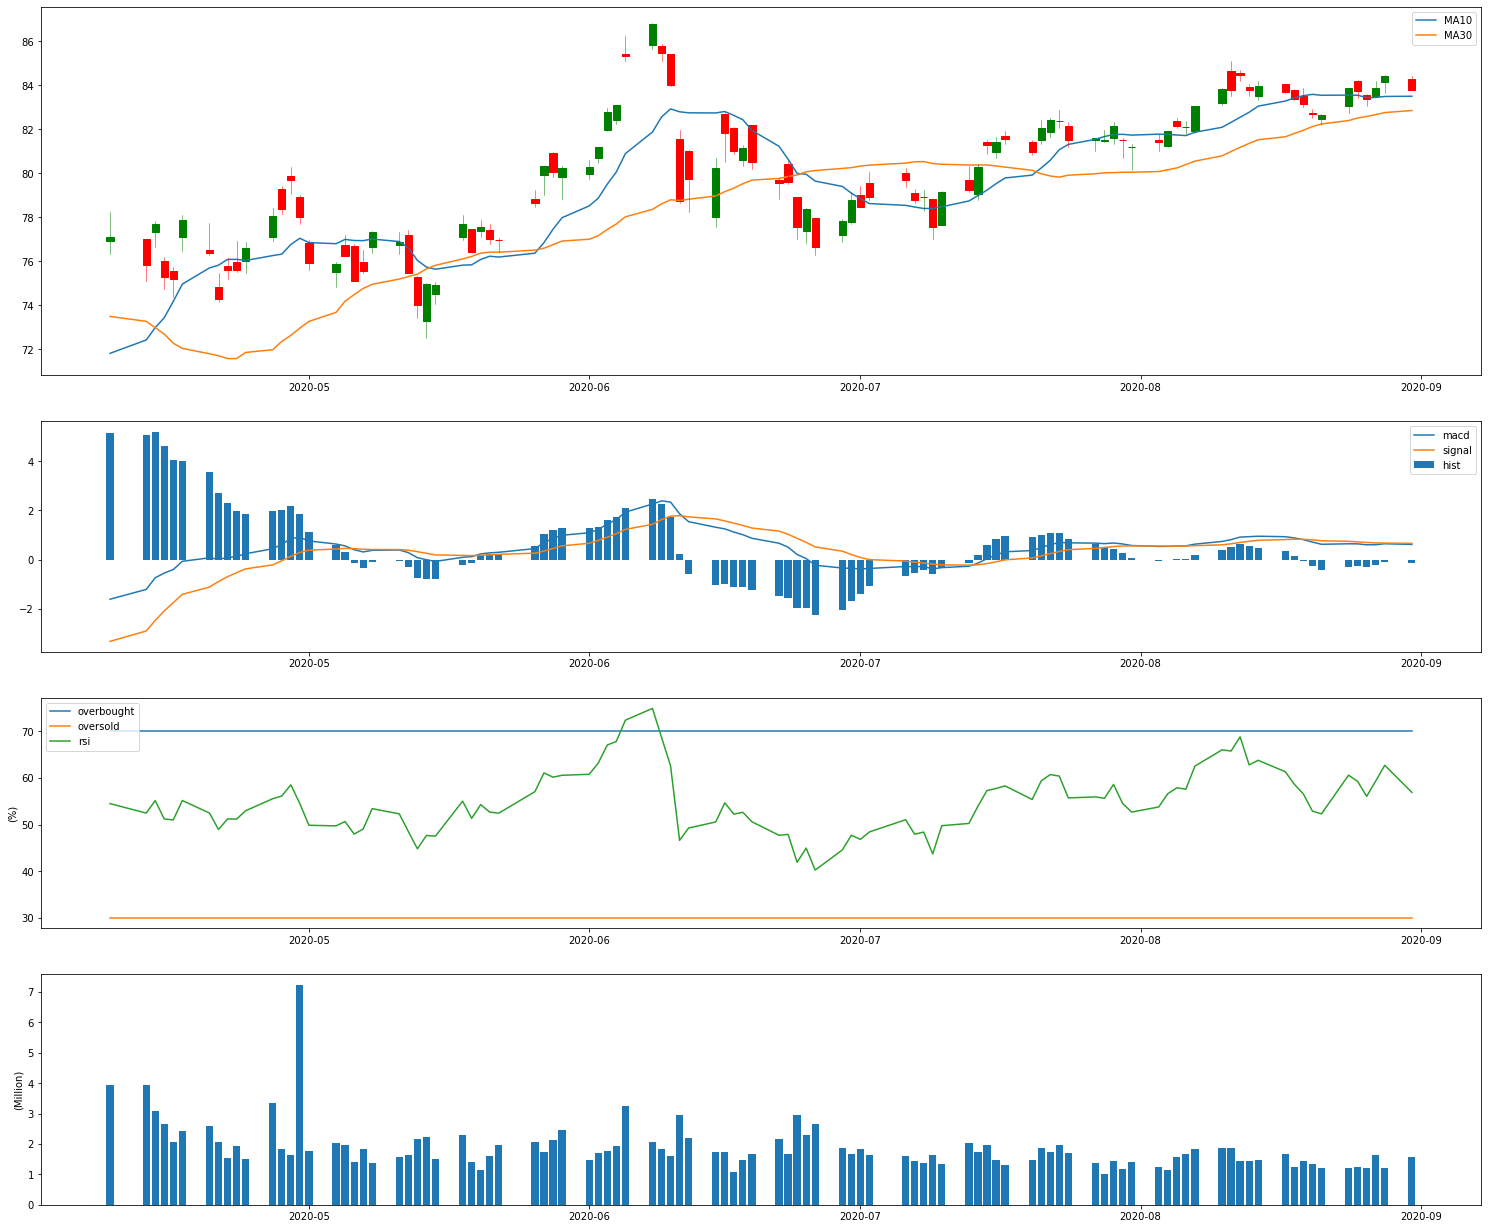

In [11]:
ticker="VYM"
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

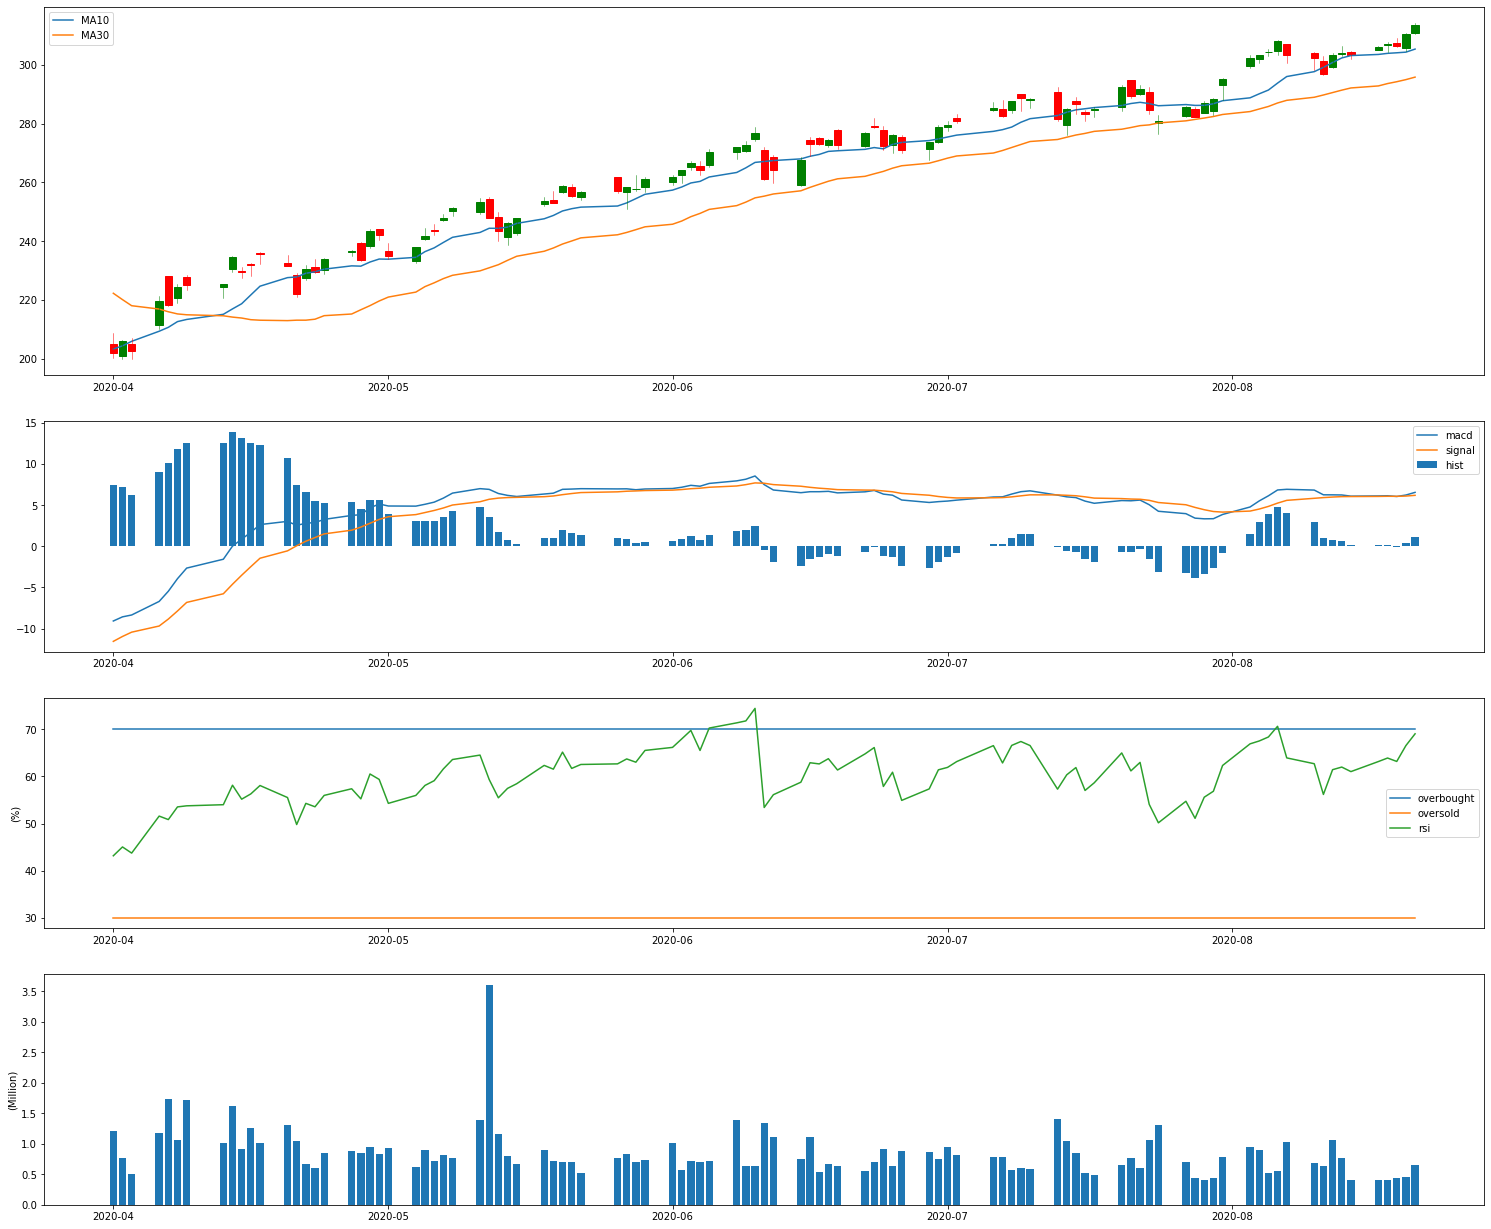

In [7]:
ticker="VGT" #IT
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

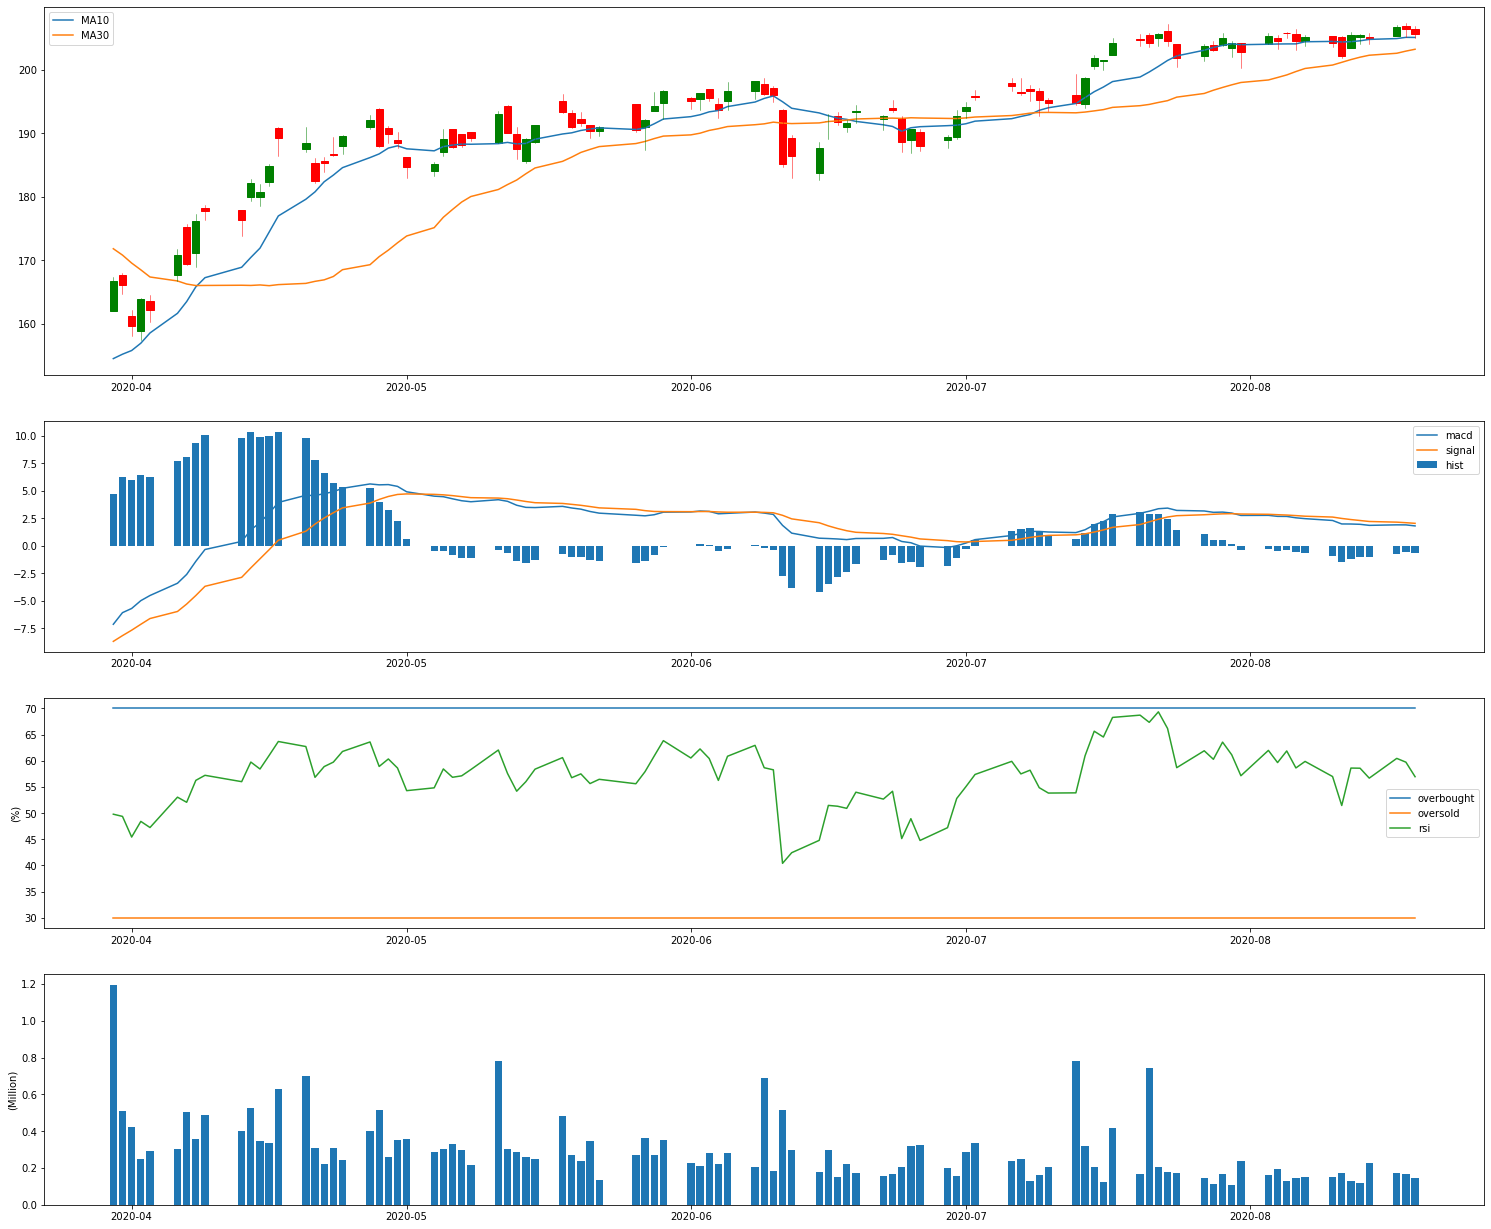

In [14]:
ticker="VHT" # health JNJ
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

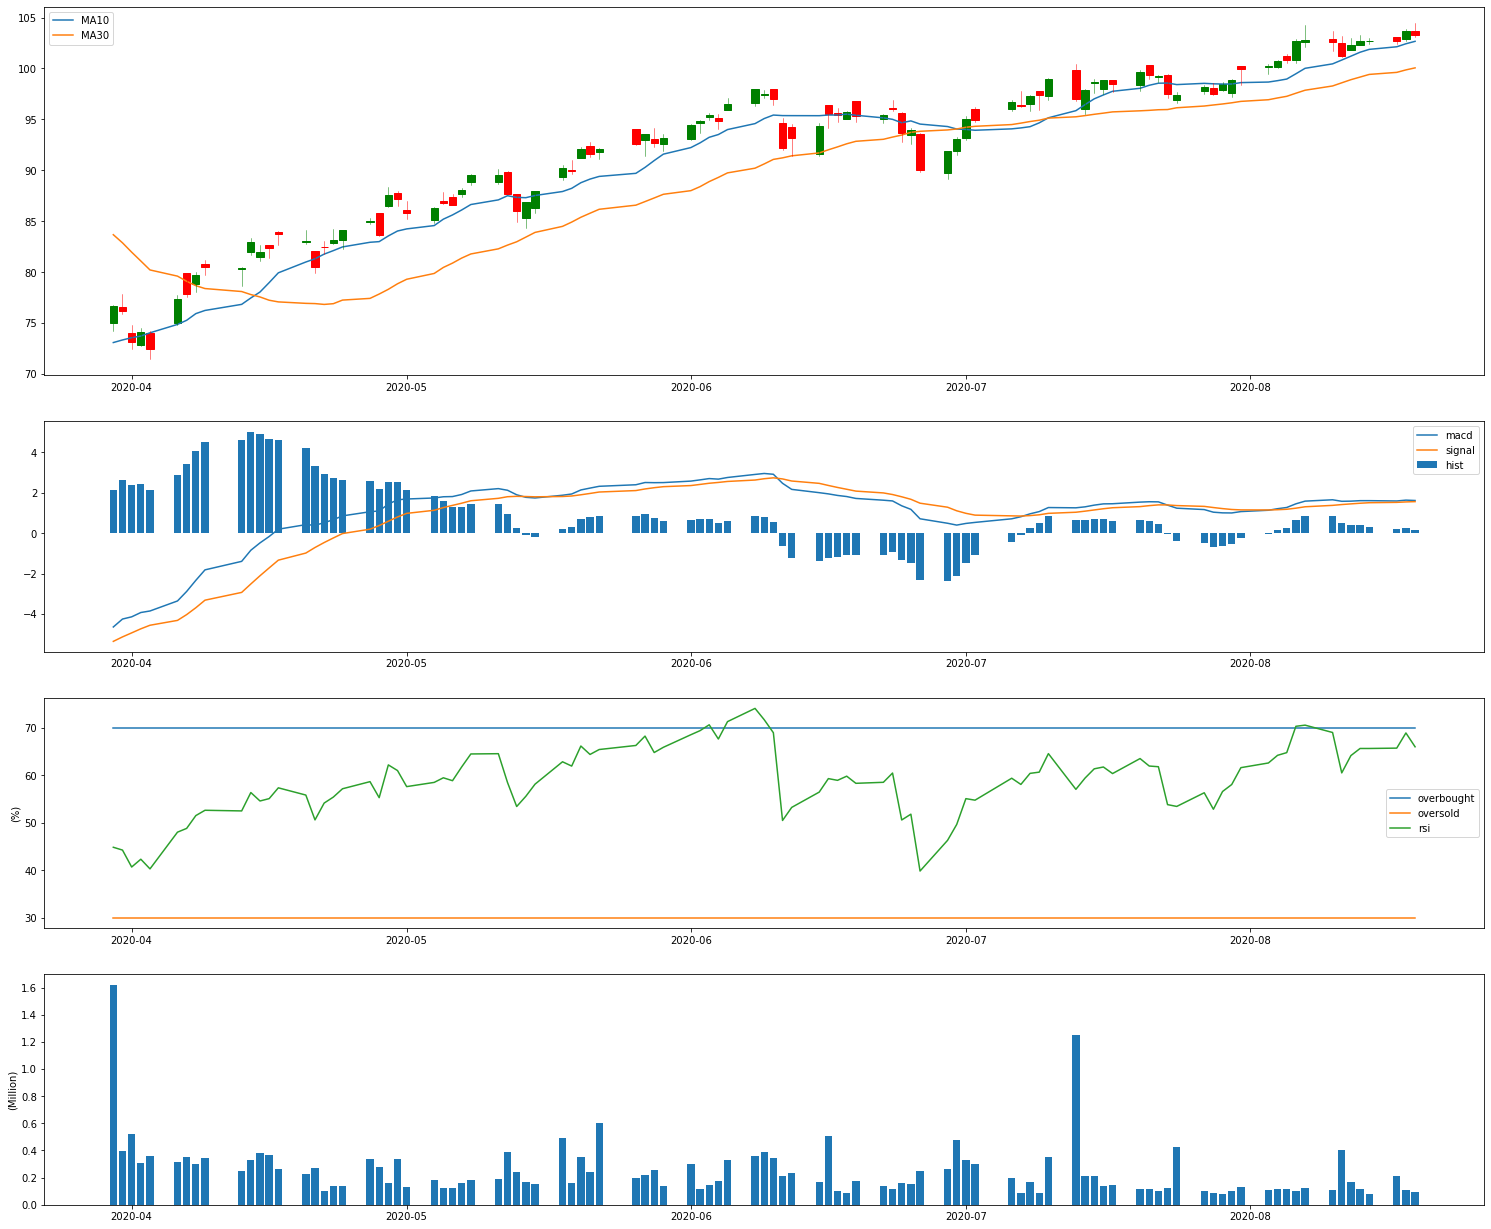

In [15]:
ticker="VOX" # communications, googl
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

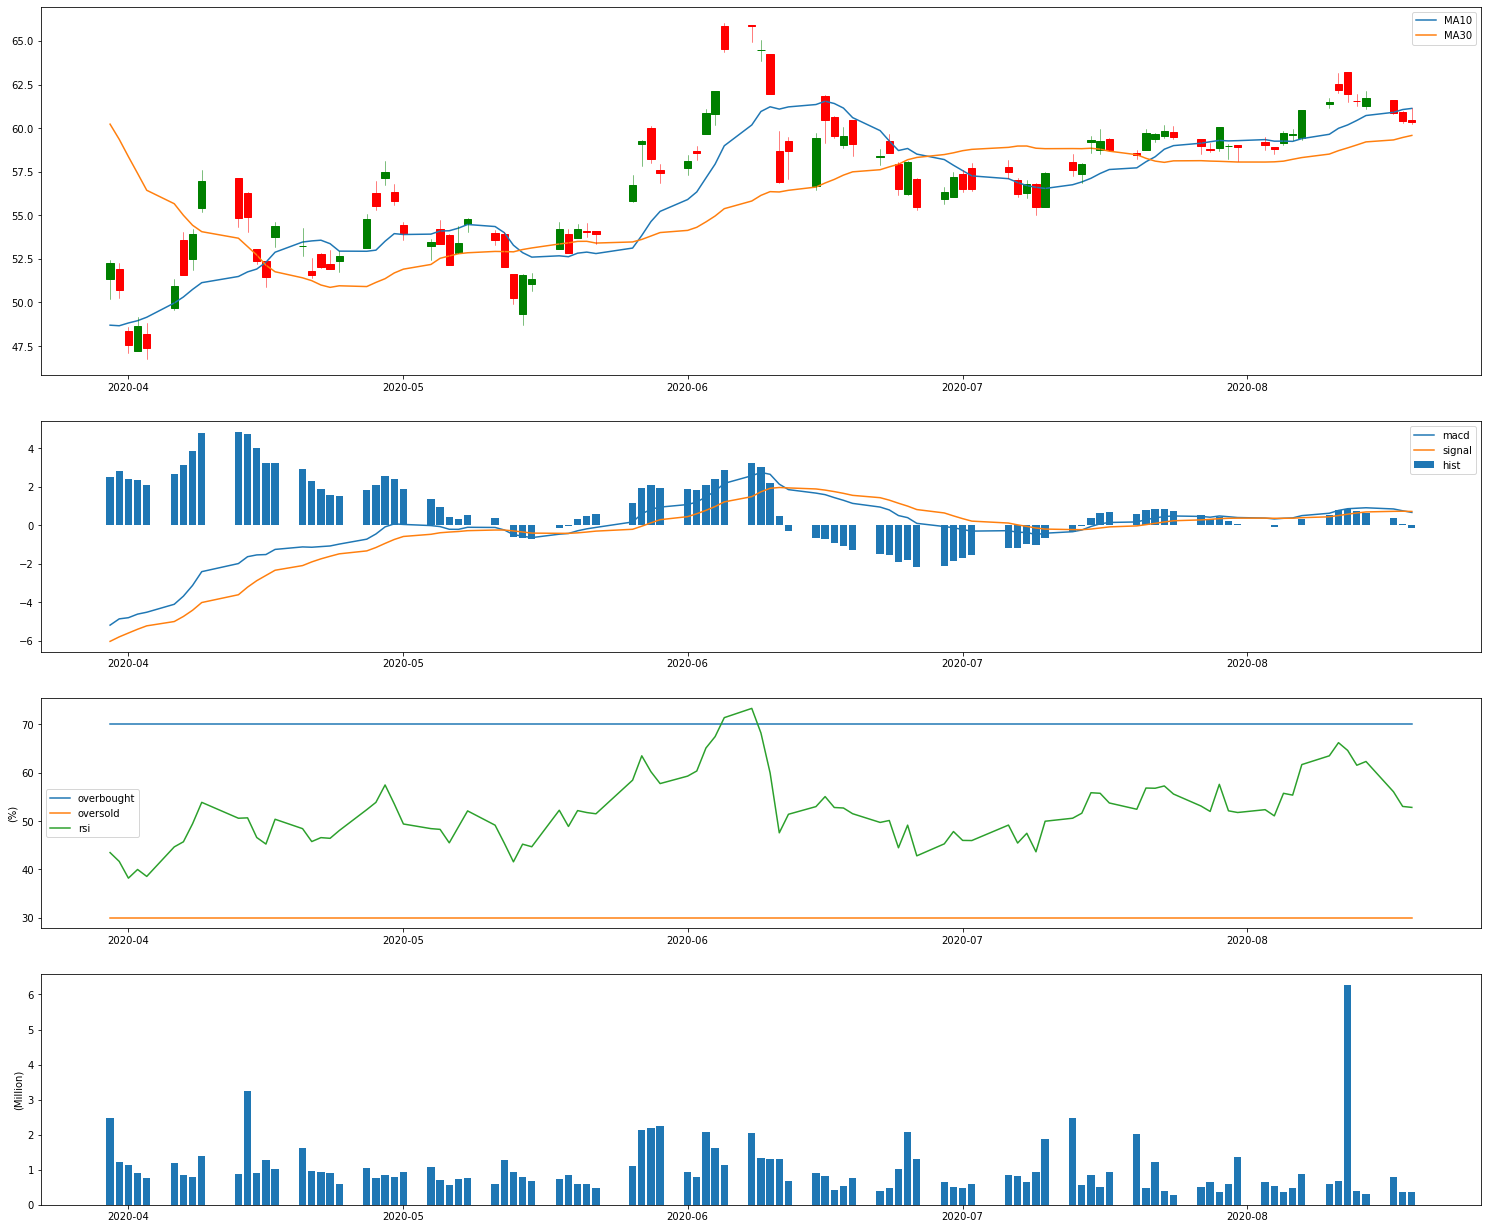

In [16]:
ticker="VFH" # financials
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

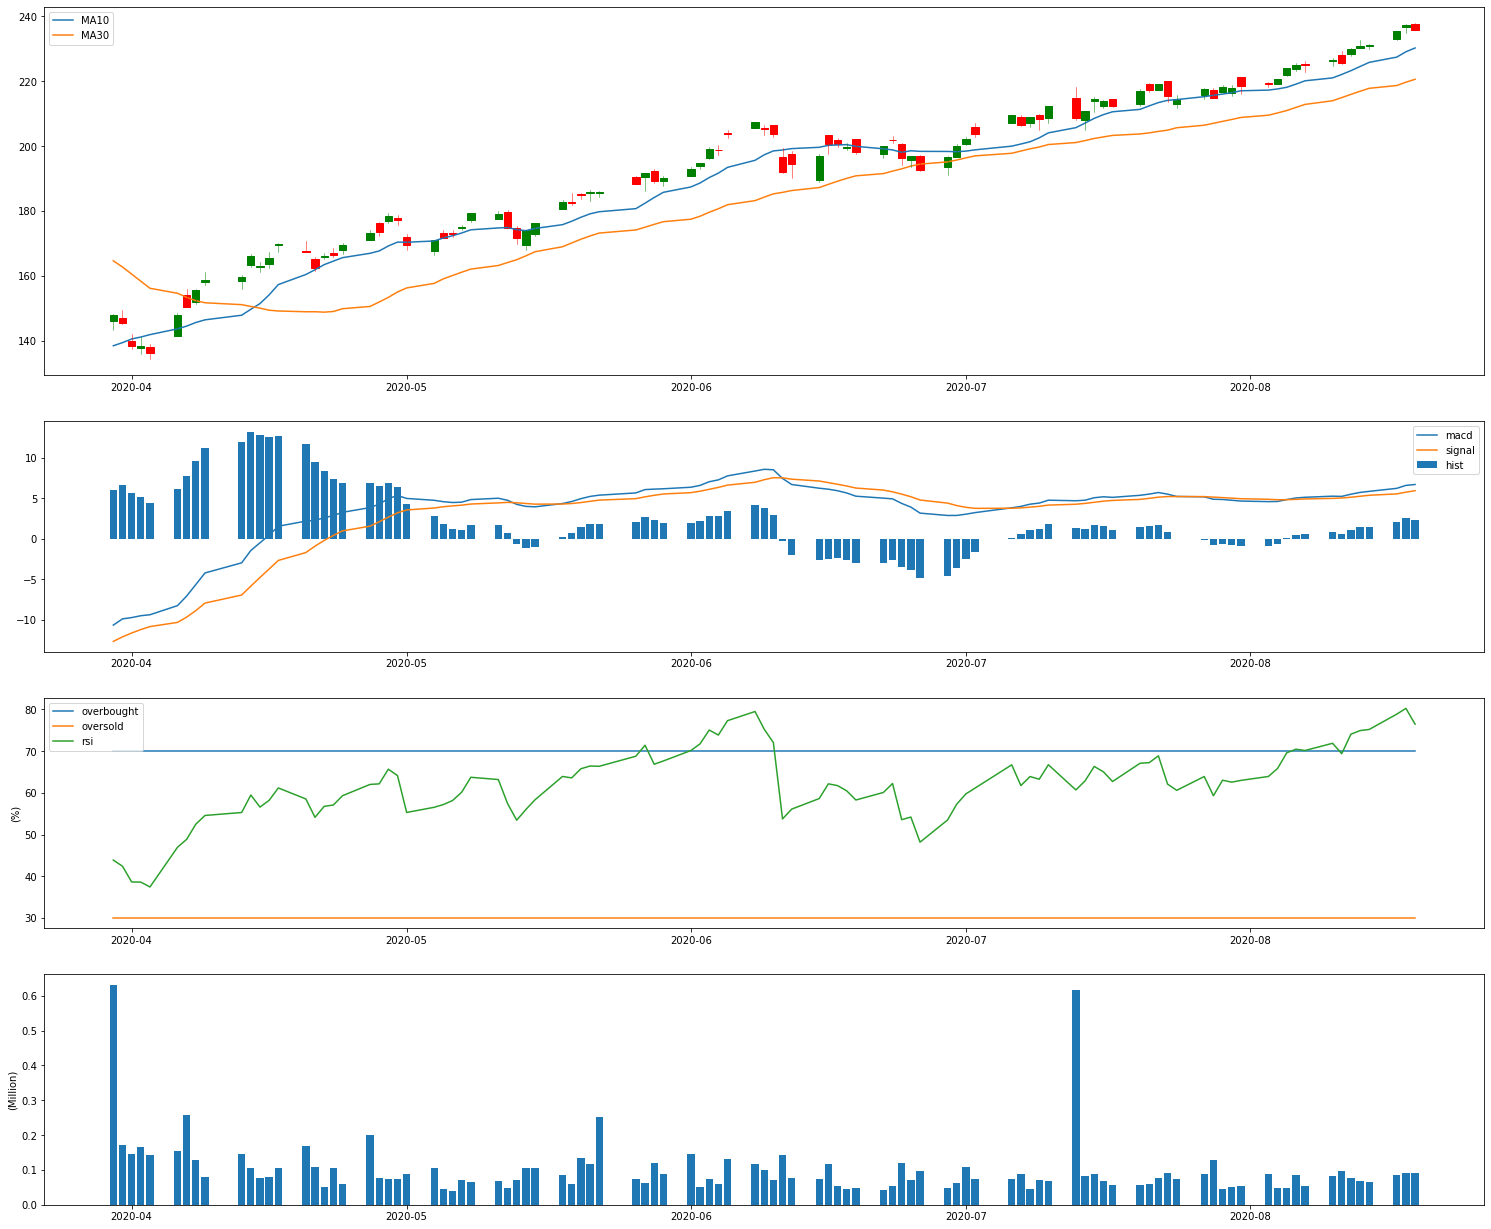

In [17]:
ticker="VCR" # consumer discretionary MCD AMZN TSLA SBUX
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

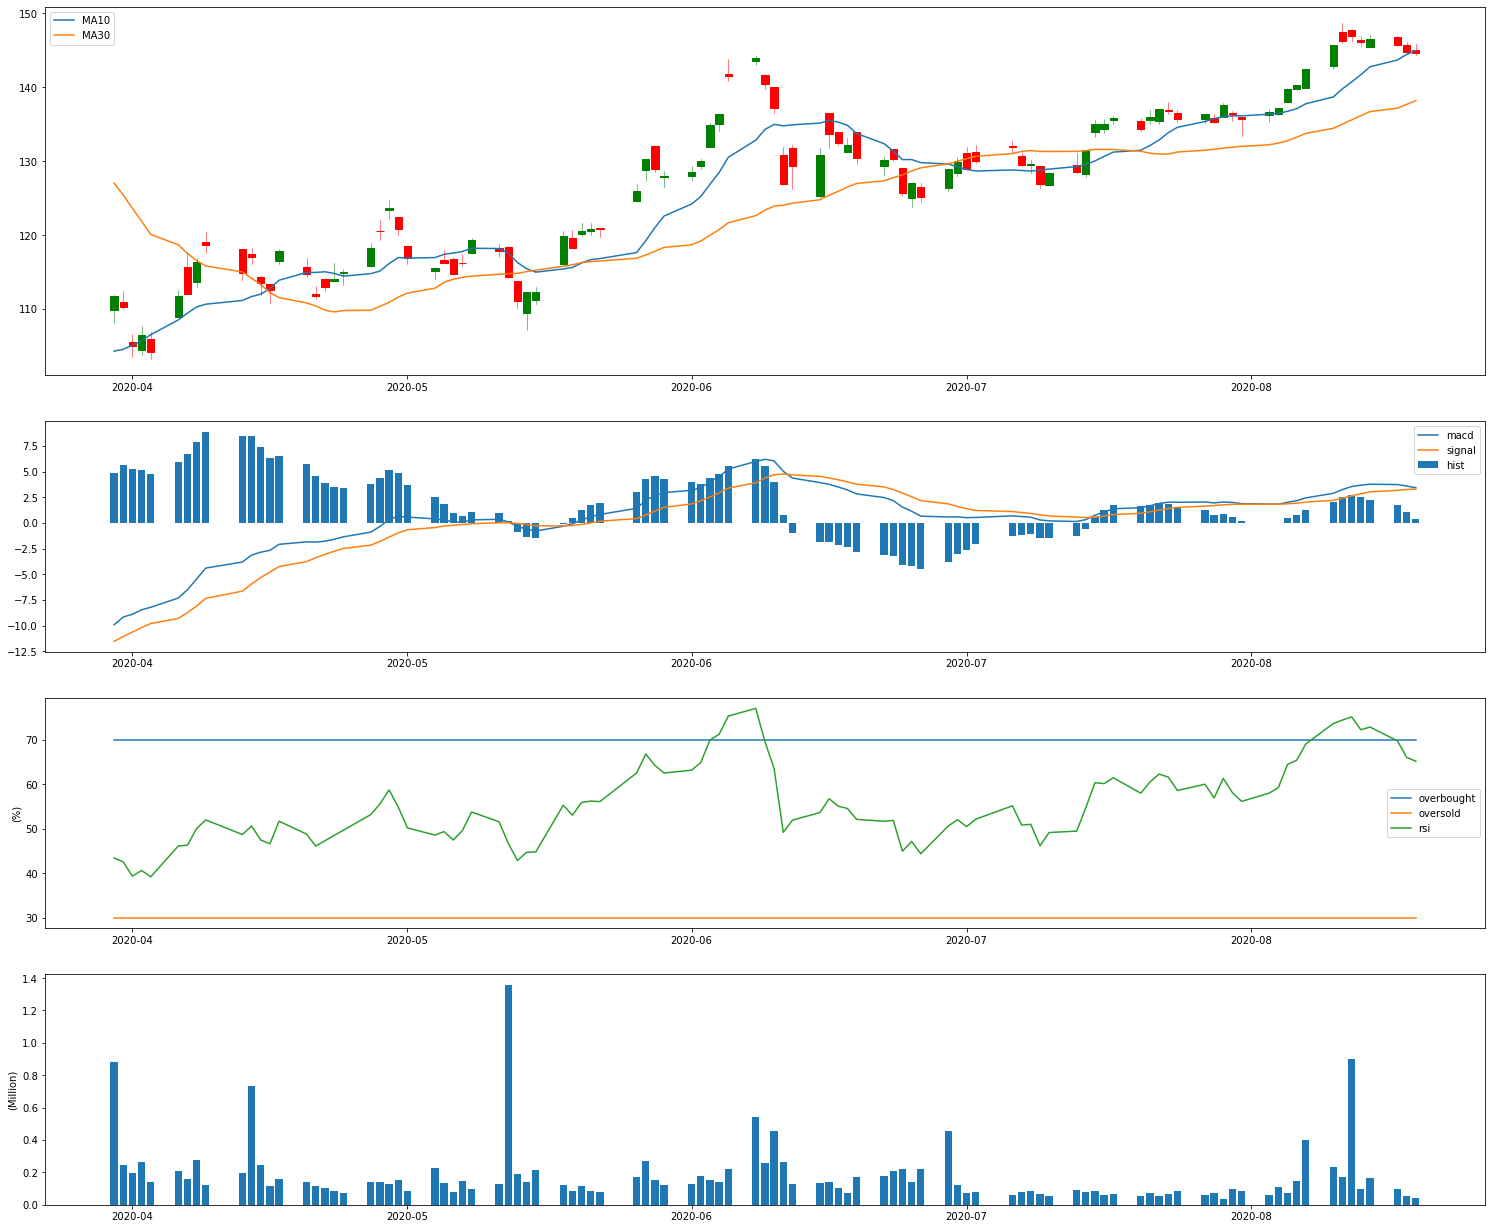

In [18]:
ticker="VIS" # industrials CAT BA 3M
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

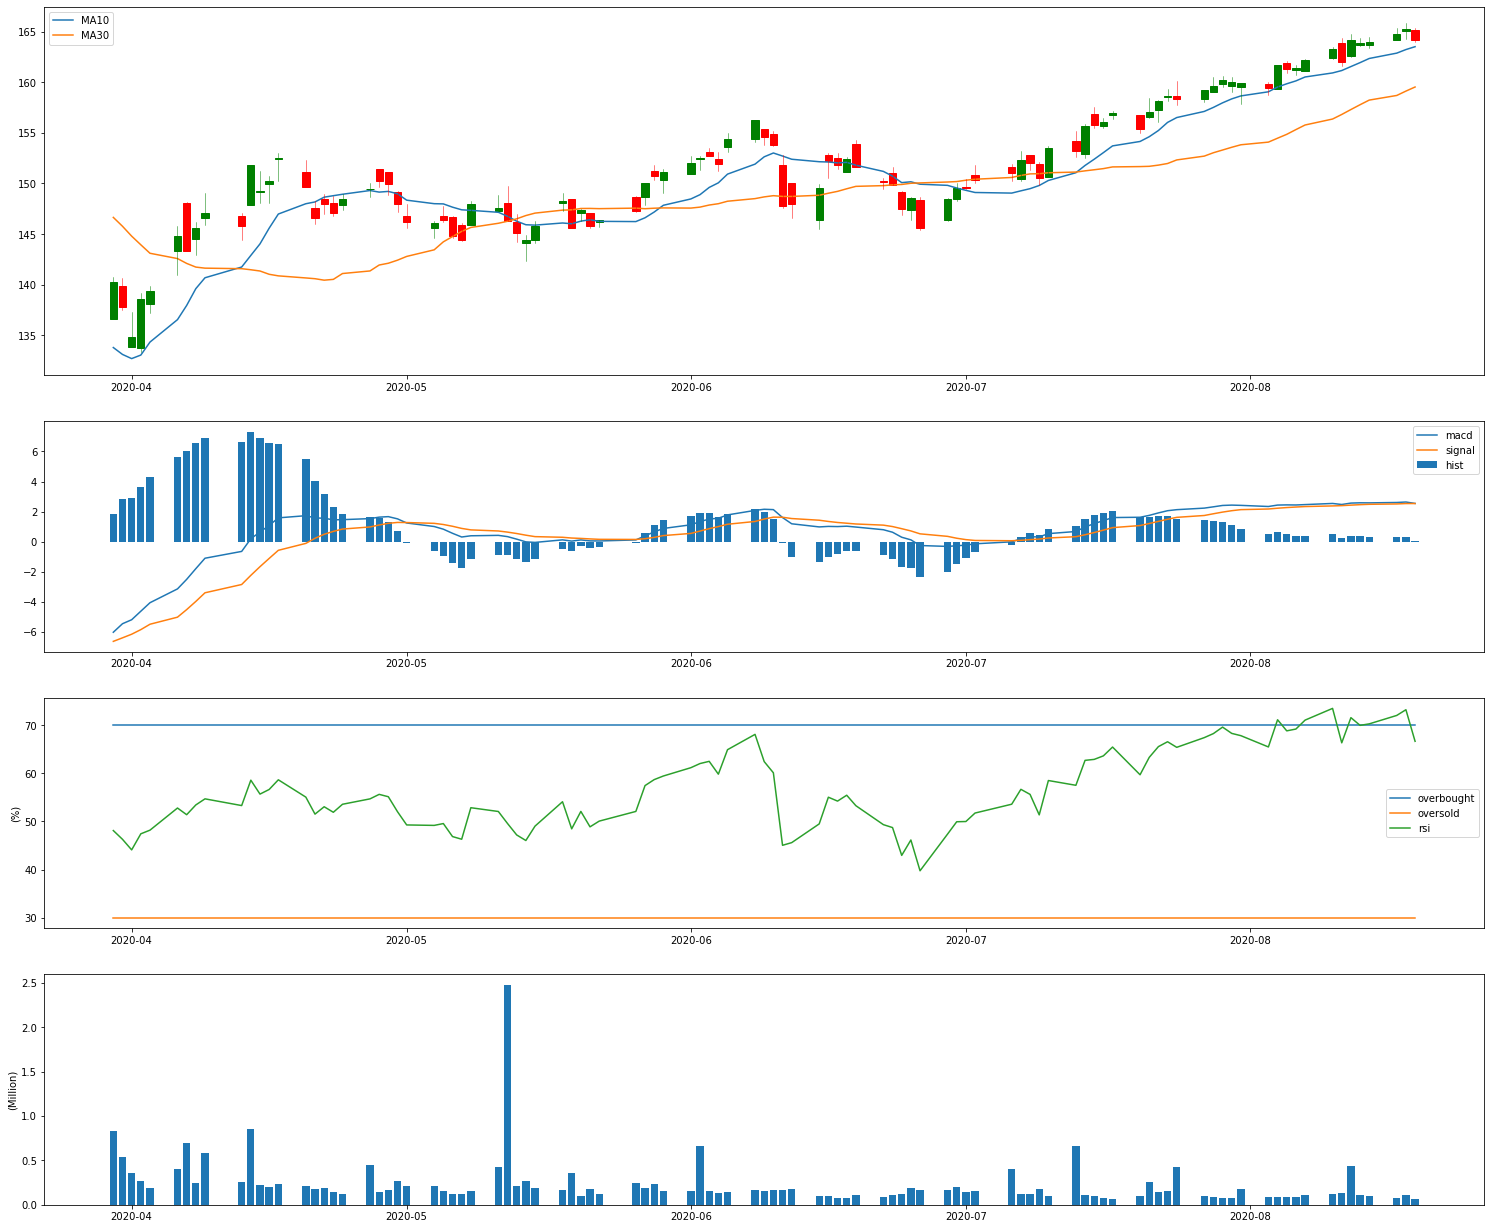

In [19]:
ticker="VDC" #CONSUMER STAPLES KO COST WMT PG
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

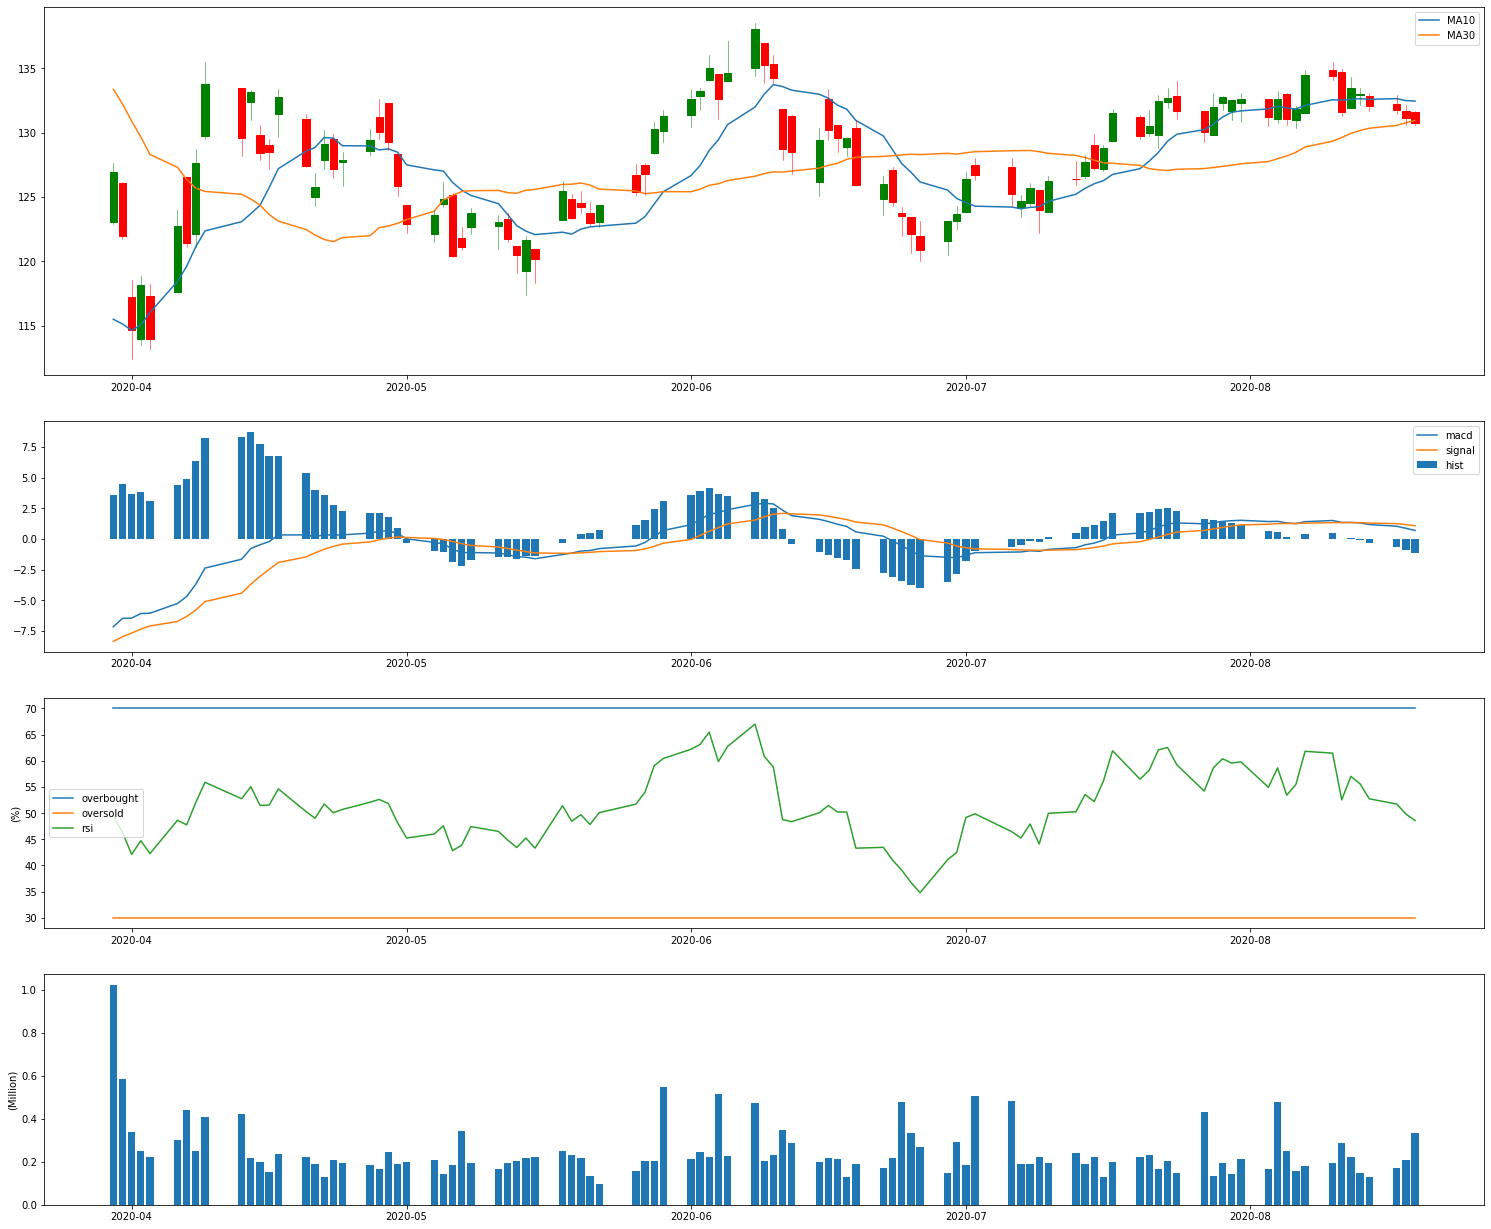

In [20]:
ticker="VPU" #UTILITIES  NEE 
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

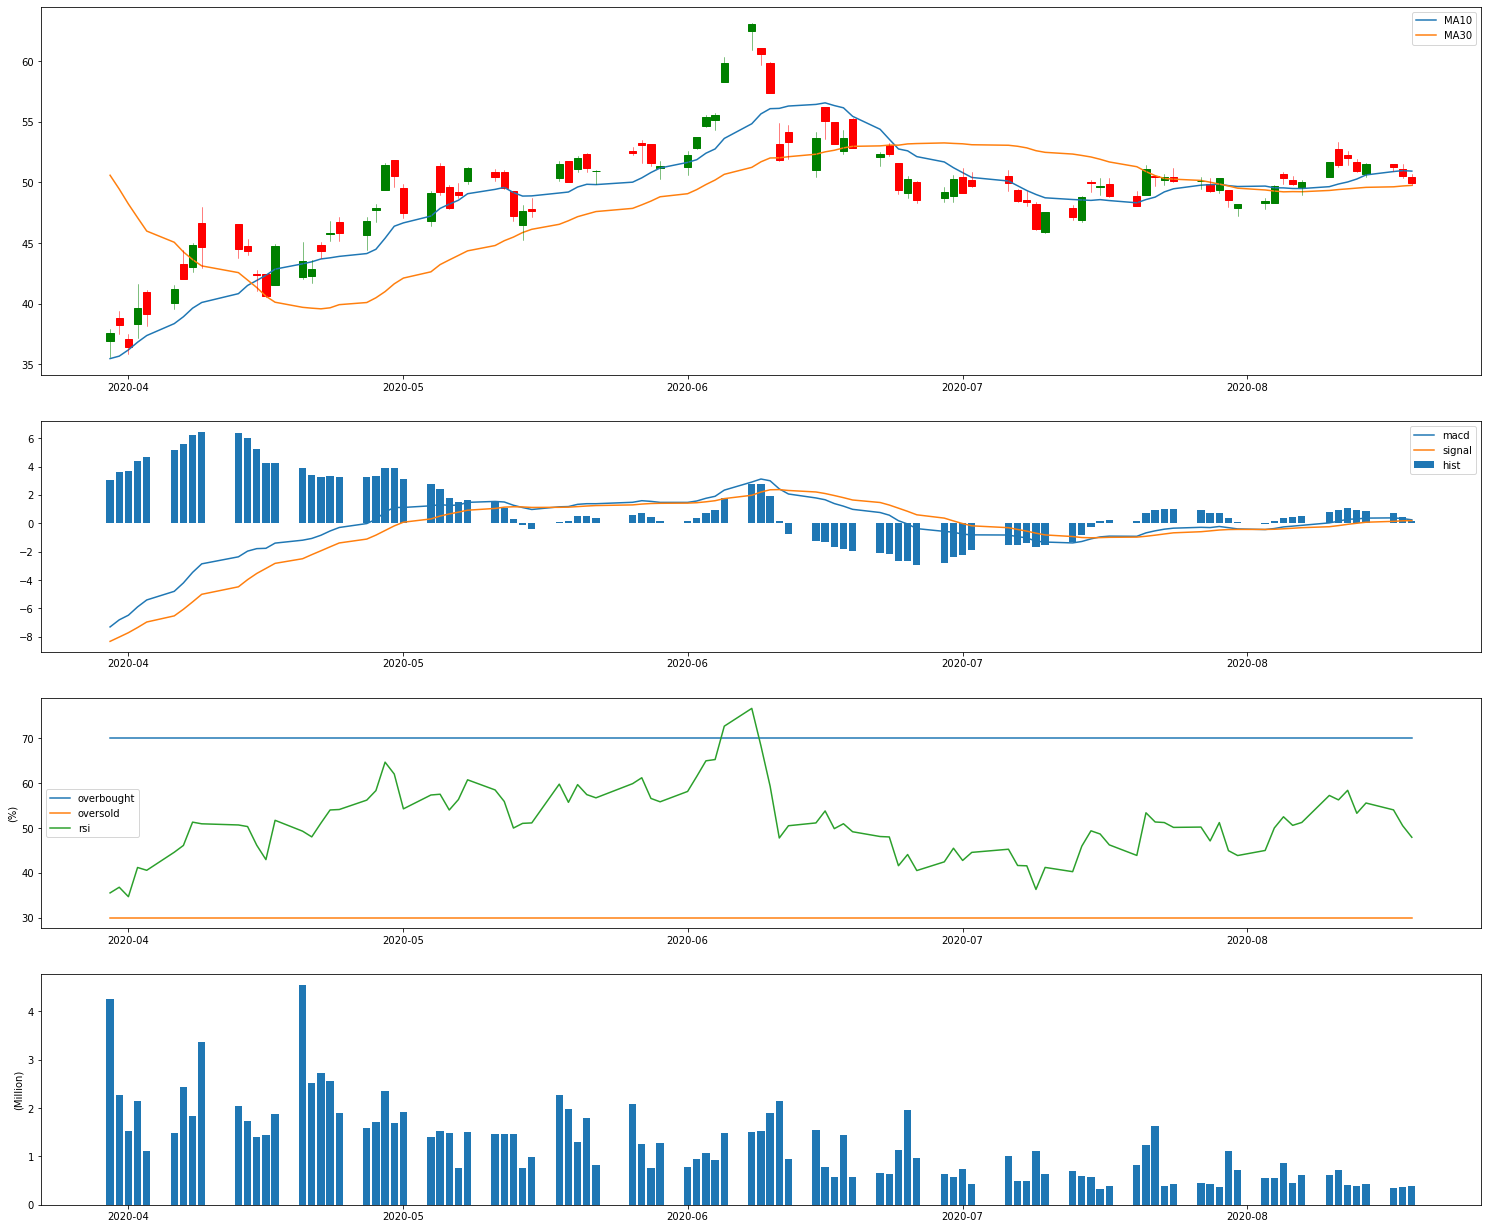

In [21]:
ticker="VDE" #ENERGY XOM, CHEVRON
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

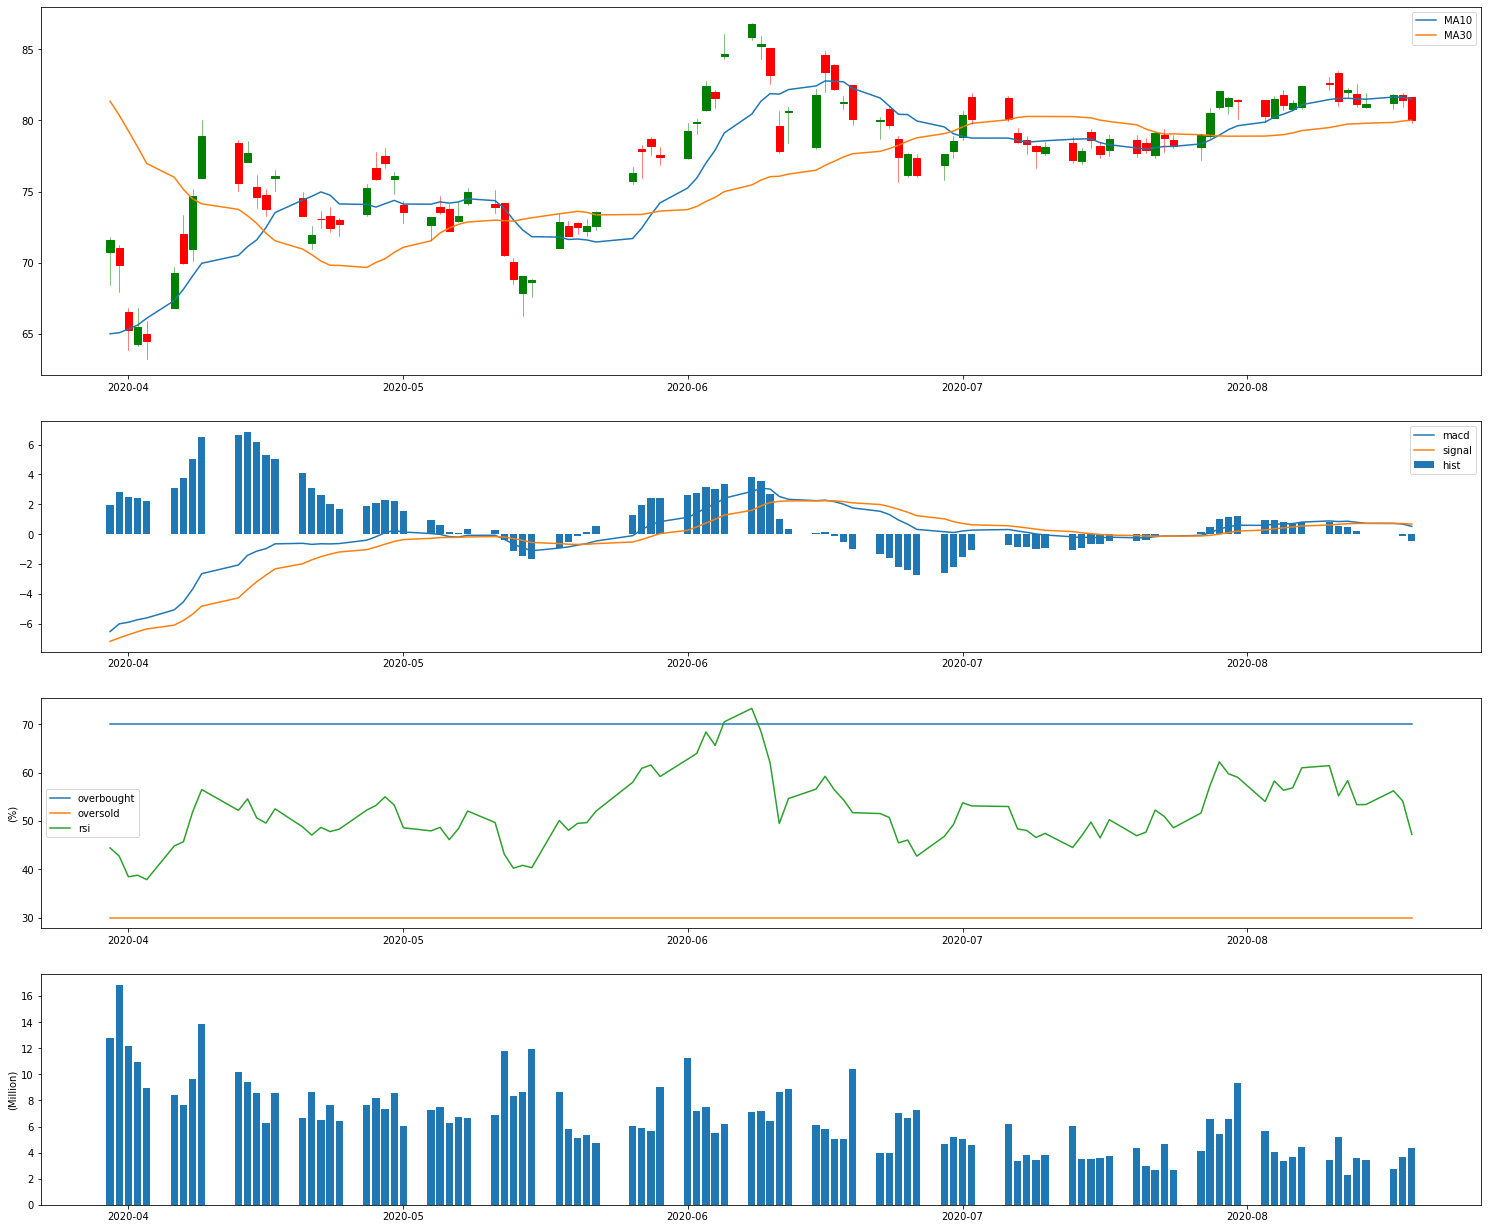

In [22]:
ticker="VNQ" #RETAILS 
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)

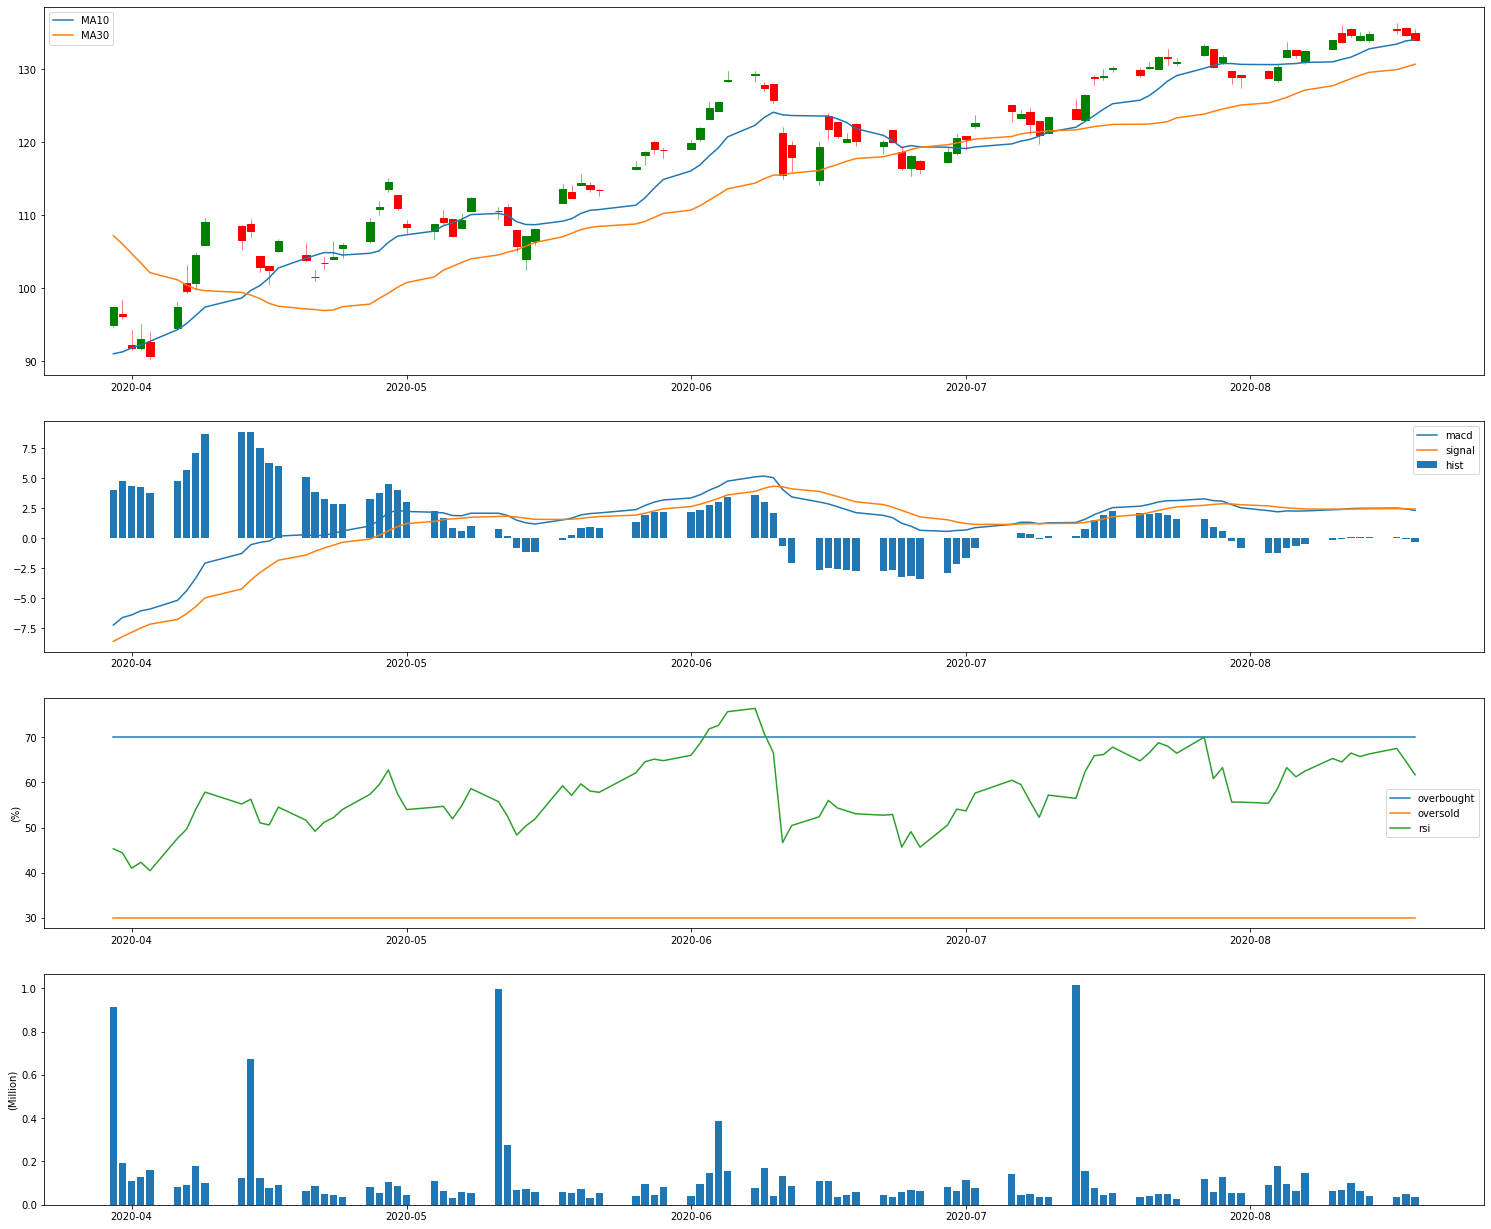

In [23]:
ticker="VAW" #MATERIALS NEM
ticker_df=get_price_hist(ticker)
ticker_df2 = get_indicators(ticker_df)
plot_chart(ticker_df2, 100, ticker)